In [12]:
from jiwer import wer
import docx
import unicodedata
import jiwer
import num2words
import matplotlib.pyplot as plt

def getText(filename):
    doc = docx.Document(filename)
    fullText = []
    for para in doc.paragraphs:
        fullText.append(para.text)
    return '\n'.join(fullText)

def removePunctuation(text):
    punctuations = ".,?!#:;°"
    cleanText = ""
    for char in text:
        if char not in punctuations:
            cleanText += char
    cleanText = cleanText.lower()
#   cleanText = unicodedata.normalize("NFKC", cleanText)  # pour enlever les "\xa0"
    cleanText = cleanText.replace("\xa0", "")
    cleanText = cleanText.replace(" \n ", " ")
    cleanText = cleanText.replace("\n", "")
    cleanText = cleanText.replace(" humm ", " ")
    cleanText = cleanText.replace("’", "'")  # Les apostrophes ne correspondent pas (’ vs ')
    for word in str.split(cleanText):
        if word.isdigit():
            len_word = len(word)
            number_word = num2words.num2words(int(word), lang='fr')  # On écrit les chiffres en toutes lettres
            pos = cleanText.find(word)
            cleanText = cleanText[:pos] + number_word + cleanText[pos+len_word:]            
    cleanText = cleanText.replace("vingt et un", "vingt-et-un")  # num2words oublie de mettre les -
    return cleanText

docText = getText("Corpus/Alexis.docx")
cleanText = removePunctuation(docText)

Text(0, 0.5, 'WER')

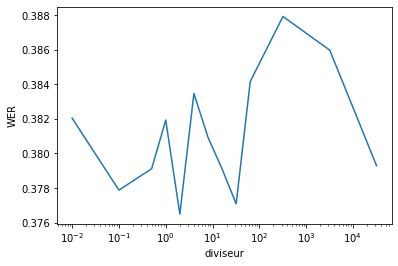

In [26]:
WER = []
diviseurs = [0.01, 0.1, 0.5, 1, 2, 4, 8, 16, 32, 64, 320, 3200, 32000]

for d in diviseurs:
    file = open('corpus_txt/vosk_alexis_d' + str(d) + '.txt','r')
    vosk_text = file.read()
    l = len(vosk_text)
    wer = jiwer.compute_measures(cleanText[:l+1000], vosk_text)['wer']
    WER.append(wer)
    file.close()
plt.plot(diviseurs, WER)
plt.xscale("log")
plt.xlabel("diviseur")
plt.ylabel("WER")

Text(0, 0.5, 'WER')

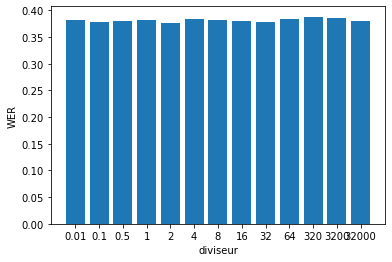

In [25]:
plt.bar([str(d) for d in diviseurs], WER)
plt.xlabel("diviseur")
plt.ylabel("WER")

In [27]:
# Pas beaucoup d'influence

In [ ]:
# Le code utilisé pour obtenir les textes transcrits vosk
"""
nb_sec = 720 # 12 min
SetLogLevel(0)
result_list = []



t0 = time.time()

for diviseur in [0.01, 0.1, 0.5, 1, 2, 4, 8, 16, 32, 64, 320, 3200, 32000]:
    wf = wave.open("corpus_wav/Alexis.wav")
    rec = KaldiRecognizer(model, wf.getframerate())
    
    for i in range(int(diviseur * nb_sec)):
        data = wf.readframes(int(wf.getframerate() // diviseur))
        rec.AcceptWaveform(data)

    res = rec.FinalResult()
    result = json.loads(res)
    text = result["text"]
    new_file = open(r'corpus_txt/vosk_alexis_d' + str(diviseur) + '.txt','w')
    new_file.write(text)
    new_file.close()
    
    result_list.append(result)

    wf.close()

Delta_t = time.time() - t0
print(Delta_t)
"""